# First steps with git 
Carsten Fortmann-Grote, May 2020

## Introduction
Git is a version control system. You may ask: What is version control good for, why should I care obout version control? Probably most of us have at some point in their career (some earlier, some later) come across as situation where they had to write document that evolved over time.It starts out simple, than more and more content comes in, often content needs to be reorganized, certain parts will be deleted or moved to other places. Changes introduced are reverted and changed in a different way etc. More often than not one wishes to travel back in time to an earlier stage in the history of the project. 
  
A "poor man's version control" system is shown in this directory listing:

In [4]:
ls  ~/how_not_to_vc

paper_final.tex         paper_v2_richard.tex
paper_really_final.tex  paper_v2.tex
paper.tex               paper_v3_with_richards_comments.tex
paper_v1.tex


The VCS will allow us to keep track of the changes applied to our documents in a meaningful way and move between the stages.
Furthermore, many Version Control Systems (VCS), allow us to work in "branches" and to (re)combine these branches into the main line of development.

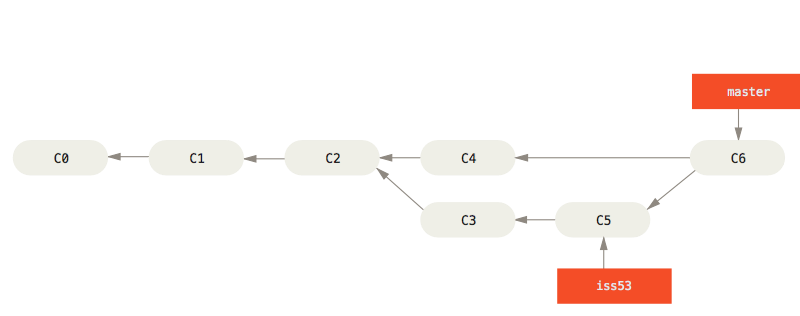  
Source: https://git-scm.com/book/en/v2

The git version control system can be thought of as a iterative workflow where paper documents move between various places:
- The modified state: The document is on our desk before us and we edit (write) it.
- Staged: When our task on the document is done or we have to work on sth else, we put the file into a shelf that has a label "Keep" on it. It can be thought of as a stash of documents that we need to keep within reach but are not actively working on it. From that stash, we can easily pull the document back to our desk and continue working on it.
- Committed: At some point, we would like to take a snapshot of the document, so we can re-open precisely the current state at a later point in time. In a paper world, we would take the stash of documents to the copy machine, make a copy from each document and put the copy into a file cabinet, tagged with a date, our name, and a remark telling us what the change of this copy with respect to the previous copy is. The original document is now in a "unmodified" state (with respect to the last backup copy). 

We then take the document back to our desk and continue working on it: It is then again in the "modified state".
 

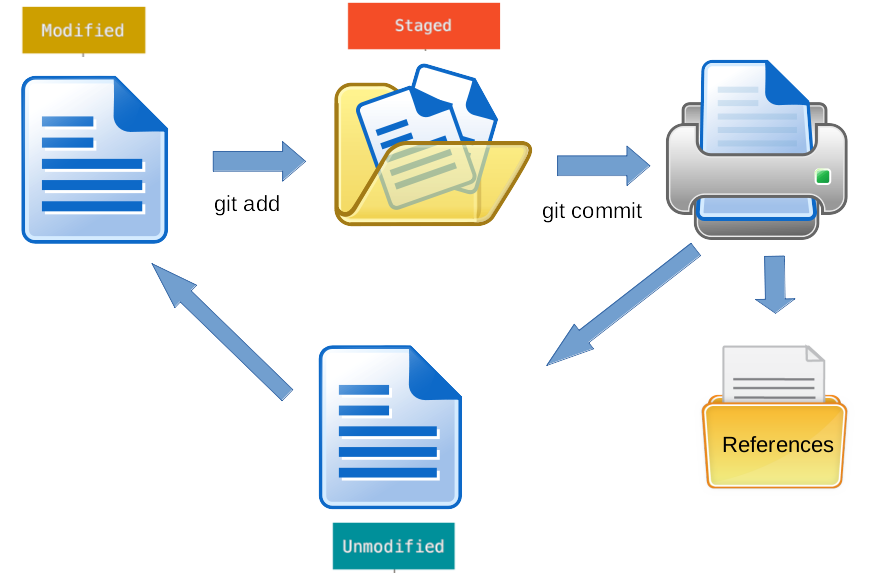

Git is a distributed VCS as opposed to centralized VCS such as CVS or SVN. In a  Distributed VCS 
every contributor works on his own local copy of files. This makes it possible for two contributors to work on the same file at the same time and to "merge" their work together when they are done.

We will learn how to use git on the command line. In this way we will get a solid understanding of the functionalities and mechanisms in git. With this background we will be well equipped to later use (and to understand what happens behind the scenes) sophisticated graphical and web based git user interfaces

## Table of content
[Git configuration](#Git-configuration)  
[Creating a new git repository](#Creating-a-new-git-repository)  
[Querying the status of a repository](#Querying-the-status-of-a-repository)  
[Putting a file under version control](#Putting-a-file-under-version-control)  
[Recording changes: `git add` and `git commit`](#Recording-changes)  
[Listing all commits: `git log`](#Listing-all-commits)    
[Listing the differences between two commits](#Listing-the-differences-between-two-commits)  
[Time travel: Checking out a (previous) commit](#Time-travel:-Checking-out-a-(previous)-commit)  
[Revert a commit](#Revert-a-commit)  
[Branching and merging](#Branching-and-merging)  
[Working with gitlab: Forking and Cloning](#Working-with-gitlab:-Forking-and-Cloning)  
[Sychronizing the local repo with the remote: `git pull` and `git push`](#Sychronizing-the-local-repo-with-the-remote)  
[Update the upstream repo: Merge Requests](#Update-the-upstream-repo)  

## Git configuration

In [ ]:
git config --global user.name Carsten

In [ ]:
git config --global user.email grotec@evolbio.mpg.de

In [ ]:
git config --global --list

## Creating a new git repository

First, we create a new directory.

In [56]:
mkdir my_first_repo

Navigate to the newly created dir.

In [57]:
cd my_first_repo

In [58]:
# The dir is empty.
ls

We now tell `git` to monitor our directory:

In [59]:
git init

Initialized empty Git repository in /home/jovyan/my_first_repo/.git/


There is now a new (hidden) directory `.git` where all version information will be stored, including the "snapshots" we are going to create.

In [60]:
ls -a

.  ..  .git


## Querying the status of a repository

The `git status` command tells us about the status of files in the directory:

In [61]:
git status

On branch master

No commits yet

nothing to commit (create/copy files and use "git add" to track)


We have not yet "registered" files to be surveilled by git, therefore `git status` returns "nothing to commit".

## Create a file
Open a new file and save it as hallo_world.R. In a terminal, you could run
```
nano hallo_world.R
```
This also works in the terminal of a jupyter notebook / jupyter lab session.

Our new directory now contains the new file "hallo_world.R"

In [62]:
ls

hallo_world.R


Let's run the script in R:

In [63]:
Rscript hallo_world.R

[1] "Hallo World."


Running `git status` again will inform us that there is now a "untracked" file (not under version control):

In [65]:
git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.ipynb_checkpoints/
	hallo_world.R

nothing added to commit but untracked files present (use "git add" to track)


Ignore the "ipynb_checkpoints" directory.

## The git cycle 

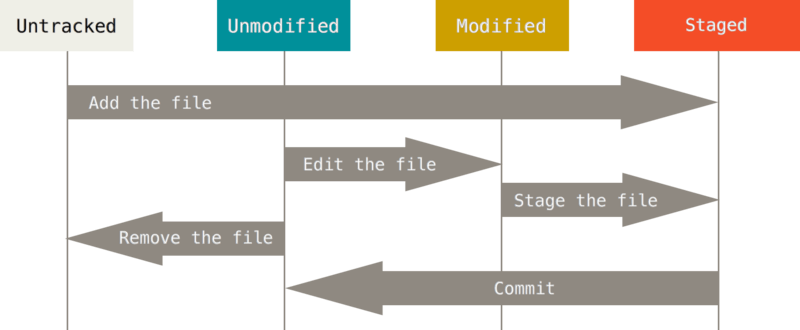  
Source: https://git-scm.com/book/en/v2

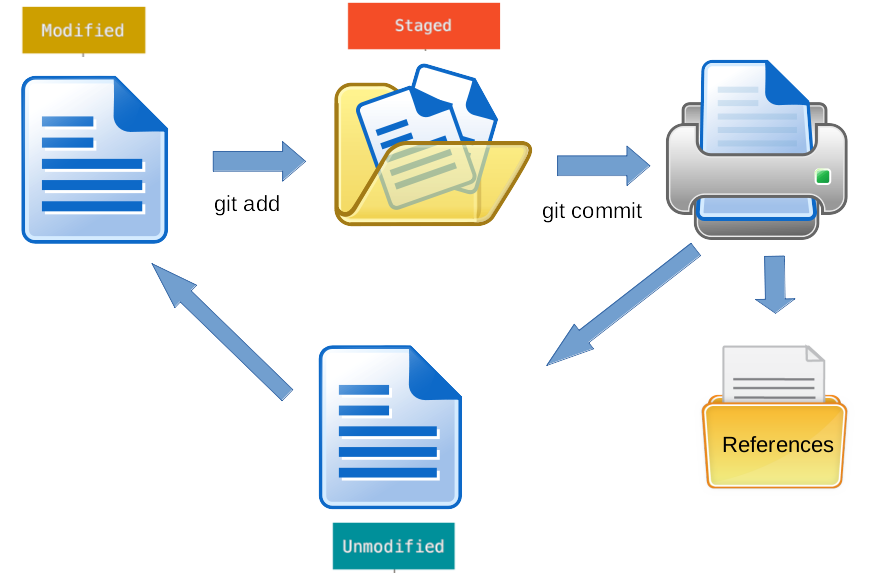

## Recording changes

To register our new file to git, we run the `git add` command. In git-speech, this process is called "staging".

In [66]:
git add hallo_world.R

Now `git status` looks differently:

In [67]:
git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)

	new file:   hallo_world.R

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.ipynb_checkpoints/



We have propagated our file from the "Untracked" to the "Staged" status.  
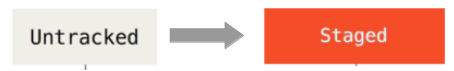

Now we want to save the current state of our file as a reference point. In git-speech, we want to "commit" our file. The `git commit` command takes the name of the file to be committed and a commit message, a brief explanation of what has changed in this commit with respect to the previous commit.

In [68]:
git commit hallo_world.R -m "First commit for the hello world example."

[master (root-commit) fbb2cd0] First commit for the hello world example.
 1 file changed, 1 insertion(+)
 create mode 100644 hallo_world.R


Now, our file is in the "Unmodified" state, because it is identical to the _copy_ that we filed away to our "file cabinet" (the location where git stores the snapshots).

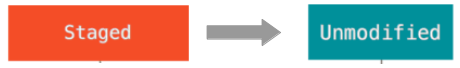

`git status` will now inform us that the directory is clean, meaning that no files that are under version control are in a modified state. Untracked files will be listed as before.

In [70]:
git status

On branch master
Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.ipynb_checkpoints/

nothing added to commit but untracked files present (use "git add" to track)


To get rid of untracked files or dirs from the git status command, we can add these files to a special file called .gitignore. After creating this file, we also register it on git and make a new commit.

In [71]:
echo ".ipynb_checkpoints" > .gitignore
git add .gitignore
git commit -a -m "Adding gitignore."

[master e47732c] Adding gitignore.
 1 file changed, 1 insertion(+)
 create mode 100644 .gitignore


`git status` will now not report the unwanted files and dirs anymore:

In [73]:
git status

On branch master
nothing to commit, working tree clean


## Listing all commits

The `git log` command lists all the previous commands:

In [74]:
git log

commit e47732ce7d653325ffefa0ca6e747962a07fe81f (HEAD -> master)
Author: Carsten <grotec@evolbio.mpg.de>
Date:   Wed May 6 15:22:17 2020 +0000

    Adding gitignore.

commit fbb2cd031d5c11dc93ef18090987b3d4b7347bfb
Author: Carsten <grotec@evolbio.mpg.de>
Date:   Wed May 6 15:15:24 2020 +0000

    First commit for the hello world example.


`git log` returns for each commit made:
- the commit hash, a unique identifier for this commit
- The author of this commit
- The date and time of this commit
- The commit message

## Listing the differences between two commits
Let's edit our R source code file. Open it in an editor and change it as follows:

```{r}
message <- "Hallo World!"

print(message)
```

Our file is now in the modified state, as `git status` will tell us.  

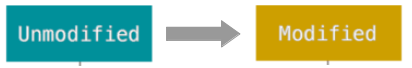

In [81]:
git status

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   hallo_world.R

no changes added to commit (use "git add" and/or "git commit -a")


To review the changes, we can run the command `git diff`:

In [82]:
git diff

diff --git a/hallo_world.R b/hallo_world.R
index 2b188f2..1c52b7d 100644
--- a/hallo_world.R
+++ b/hallo_world.R
@@ -1 +1,3 @@
-print("Hallo World.")
+message <- "Hallo World!"
+
+print(message)


By default, `git diff` compares the current state to the last commit. Alternatively, we can add one or two commit hashes to compare to a given commit (one hash) or between two commits (two hashes).

Let's commit our last change

### stage

In [86]:
git add hallo_world.R

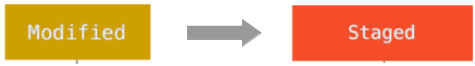

### Commit 

In [ ]:
git commit hallo_world.R -m "Save string in variable."

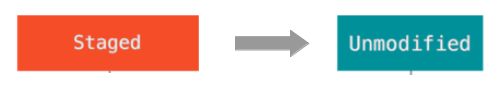

In [89]:
git log

commit 093fc0146db993a8e0ad5c3737ff63f13bd90122 (HEAD -> master)
Author: Carsten <grotec@evolbio.mpg.de>
Date:   Wed May 6 15:33:36 2020 +0000

    Store greeting in message

commit e47732ce7d653325ffefa0ca6e747962a07fe81f
Author: Carsten <grotec@evolbio.mpg.de>
Date:   Wed May 6 15:22:17 2020 +0000

    Adding gitignore.

commit fbb2cd031d5c11dc93ef18090987b3d4b7347bfb
Author: Carsten <grotec@evolbio.mpg.de>
Date:   Wed May 6 15:15:24 2020 +0000

    First commit for the hello world example.


In [90]:
git status

On branch master
nothing to commit, working tree clean


`git diff` now returns nothing because our file is in the "Unmodified" state.

In [92]:
git diff

## Time travel: Checking out a (previous) commit

The `git checkout` commands allows us to revert our file(s) to a state from an earlier commit. Find the commit hash to revert to from `git log` first. Highlight the hash and copy it (Ctrl-C). Then paste into the `git checkout` command. It's actually sufficient to take only the first 8 characters from the hash.

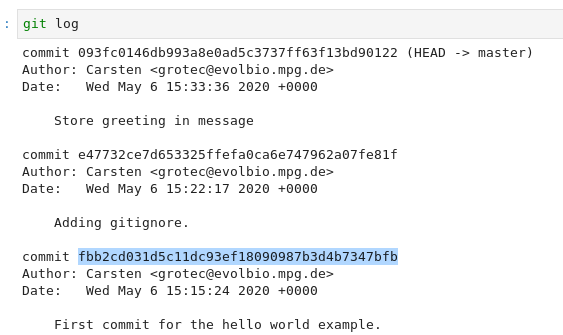

In [94]:
git checkout fbb2cd03

Note: checking out 'fbb2cd03'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at fbb2cd0 First commit for the hello world example.


The message about "detached HEAD" means that our file(s) have now reverted to a state from an earlier commit. Any changes to our files would not be commited directy
back to our branch (more about branches further below).

The history reported by `git log` now contains only the commits before the checked out commit:

In [95]:
git log

commit fbb2cd031d5c11dc93ef18090987b3d4b7347bfb (HEAD)
Author: Carsten <grotec@evolbio.mpg.de>
Date:   Wed May 6 15:15:24 2020 +0000

    First commit for the hello world example.


Confirm that the file "hallo_world.R" has indeed reverted to the first commit.

## Check out the tip of the branch (aka HEAD)

To go back to the "tip of the branch" (the state where we left from before checking out an earlier commit) we run

In [96]:
git checkout master

Previous HEAD position was fbb2cd0 First commit for the hello world example.
Switched to branch 'master'


In [97]:
git status

On branch master
nothing to commit, working tree clean


In [98]:
git log

commit 093fc0146db993a8e0ad5c3737ff63f13bd90122 (HEAD -> master)
Author: Carsten <grotec@evolbio.mpg.de>
Date:   Wed May 6 15:33:36 2020 +0000

    Store greeting in message

commit e47732ce7d653325ffefa0ca6e747962a07fe81f
Author: Carsten <grotec@evolbio.mpg.de>
Date:   Wed May 6 15:22:17 2020 +0000

    Adding gitignore.

commit fbb2cd031d5c11dc93ef18090987b3d4b7347bfb
Author: Carsten <grotec@evolbio.mpg.de>
Date:   Wed May 6 15:15:24 2020 +0000

    First commit for the hello world example.


## Branching and merging
Now let's assume we made a couple of commits to our repository and now would like to try a new feature in our code. We would like to test the
new feature before integration into our main line of development. At the same time, we want to make changes to the main line of development, in parallel
to testing the new feature. Git supports this workflow scheme with the concept of branches. We have already encountered branches earlier, when running the `git status` command.

In [3]:
git status

On branch master
nothing to commit, working tree clean


The first line printed by `git status` tells us which branch we are currently on. By default, this is the `master` branch. To list all branches in our repository, we use the command

In [4]:
git branch

* master


We have only one branch, the `master` branch.

To create a new branch, we append the name of that new branch to `git branch`:

In [18]:
git branch iss53

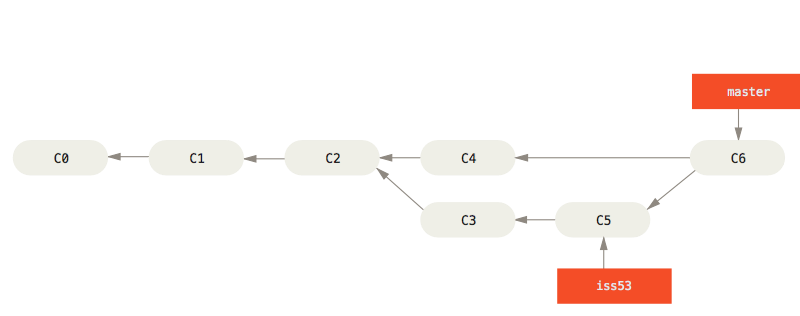  
Source: https://git-scm.com/book/en/v2

Running `git branch` again (without arguments), we see the newly created branch besides the master branch:

In [19]:
git branch

  iss53
* master


The asterisk marks our current branch. To work in the new branch, we have to check it out:

In [20]:
git checkout iss53

Switched to branch 'iss53'


In [21]:
git branch

* iss53
  master


In [22]:
git status

On branch iss53
nothing to commit, working tree clean


So far, nothing has happened to our files as a `git status` and a `git log` will tell us.

In [23]:
git log

commit 093fc0146db993a8e0ad5c3737ff63f13bd90122 (HEAD -> iss53, master)
Author: Carsten <grotec@evolbio.mpg.de>
Date:   Wed May 6 15:33:36 2020 +0000

    Store greeting in message

commit e47732ce7d653325ffefa0ca6e747962a07fe81f
Author: Carsten <grotec@evolbio.mpg.de>
Date:   Wed May 6 15:22:17 2020 +0000

    Adding gitignore.

commit fbb2cd031d5c11dc93ef18090987b3d4b7347bfb
Author: Carsten <grotec@evolbio.mpg.de>
Date:   Wed May 6 15:15:24 2020 +0000

    First commit for the hello world example.


 Following the analogy of our "paper on the desk" model, all we did was to replicate the last backup copy in our file cabinet put that replicate into a new drawer.

Now apply a few more changes to the R script to make it look like this:
```
message <- "Hallo World "

greeting <- function(mess) {
   print(mess)
}


for (i in 1:10) {
    greeting(paste(message, i, "!", sep=" "))
}
```


Can you tell (without running the code) what this version of our script will do? Check your answer by running the script:

In [25]:
Rscript hallo_world.R

[1] "Hallo World  1 !"
[1] "Hallo World  2 !"
[1] "Hallo World  3 !"
[1] "Hallo World  4 !"
[1] "Hallo World  5 !"
[1] "Hallo World  6 !"
[1] "Hallo World  7 !"
[1] "Hallo World  8 !"
[1] "Hallo World  9 !"
[1] "Hallo World  10 !"


### Stage and commit in one go. 
Let's commit the last change to our `iss53` branch. It turns out that I can actually skip the `git add` command and commit directly to the repository.

In [26]:
git commit hallo_world.R -m "Added a function and a loop"

[iss53 8cdfe75] Added a function and a loop
 1 file changed, 9 insertions(+), 2 deletions(-)


In [27]:
git log

commit 8cdfe7539e44d3b7e3dc9fec169fa83b3c9cc613 (HEAD -> iss53)
Author: Carsten <grotec@evolbio.mpg.de>
Date:   Wed May 6 18:10:57 2020 +0000

    Added a function and a loop

commit 093fc0146db993a8e0ad5c3737ff63f13bd90122 (master)
Author: Carsten <grotec@evolbio.mpg.de>
Date:   Wed May 6 15:33:36 2020 +0000

    Store greeting in message

commit e47732ce7d653325ffefa0ca6e747962a07fe81f
Author: Carsten <grotec@evolbio.mpg.de>
Date:   Wed May 6 15:22:17 2020 +0000

    Adding gitignore.

commit fbb2cd031d5c11dc93ef18090987b3d4b7347bfb
Author: Carsten <grotec@evolbio.mpg.de>
Date:   Wed May 6 15:15:24 2020 +0000

    First commit for the hello world example.


###  Merge with master branch
Once we are happy with our results, we want to integrate our new feature into the master branch. To this end, we first switch back to the master branch:

In [28]:
git checkout master

Switched to branch 'master'


and use the `git merge` command to bring in the changes from the `iss53` branch. I always append the `--no-ff` flag to `git merge` to create a dedicated merge commit. In this way I can later identify changes in the code that are a result from a merge.

In [29]:
git merge iss53 --no-ff -m "Merge branch iss53"

Merge made by the 'recursive' strategy.
 hallo_world.R | 11 +++++++++--
 1 file changed, 9 insertions(+), 2 deletions(-)


Let's now look at our history. I will append some flags to `git log` here that will visualize the tree-like structure of our history:

In [30]:
git log --pretty=oneline --graph --abbrev-commit

*   b1cb4aa (HEAD -> master) Merge branch iss53
|\  
| * 8cdfe75 (iss53) Added a function and a loop
|/  
* 093fc01 Store greeting in message
* e47732c Adding gitignore.
* fbb2cd0 First commit for the hello world example.


We have made 3 initial commits in the master branch, then branched of to the `iss53` branch, made one commit here and brought in the new features into the master branch by merging.

### Delete feature branch 
If we are certain that the feature branch `iss53` will no longer be used, we can delete it:

In [31]:
git branch -D iss53

Deleted branch iss53 (was 8cdfe75).


`git branch` will tell us that master is now our only branch again.

In [32]:
git branch

* master
